In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pvtrace
import scintillator_tracer as st

# Verification

In [3]:
nodes = st.worlds.build_doorstop_angled_world()
world = nodes['world']
crystal = nodes['crystal']

height = st.geometry_helpers.get_node_height(crystal)
light = st.definitions.generate_scintillated_light_node(world, 'light')
light.location = (0, 0, height/2)

scene = pvtrace.Scene(world)
all_ray_steps = st.processing.process_photons_with_visual(scene, 100, 10, wireframe=False, open_browser=True)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7002/static/


# Grid trials

In [4]:
nodes = st.worlds.build_doorstop_angled_world()
crystal = nodes['crystal']

zrange = (
    st.geometry_helpers.min_physical_value(crystal, 'z')+0.5,
    st.geometry_helpers.max_physical_value(crystal, 'z')-0.5,
)
yrange = (
    st.geometry_helpers.min_physical_value(crystal, 'y')+0.1,
    st.geometry_helpers.max_physical_value(crystal, 'y')-0.1,
)

crystal_width = st.geometry_helpers.max_physical_value(crystal, 'y') - st.geometry_helpers.min_physical_value(crystal, 'y')
crystal_height = st.geometry_helpers.max_physical_value(crystal, 'z') - st.geometry_helpers.min_physical_value(crystal, 'z')
cut_depth = crystal_width / np.tan(np.radians(90-30))

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7003/static/


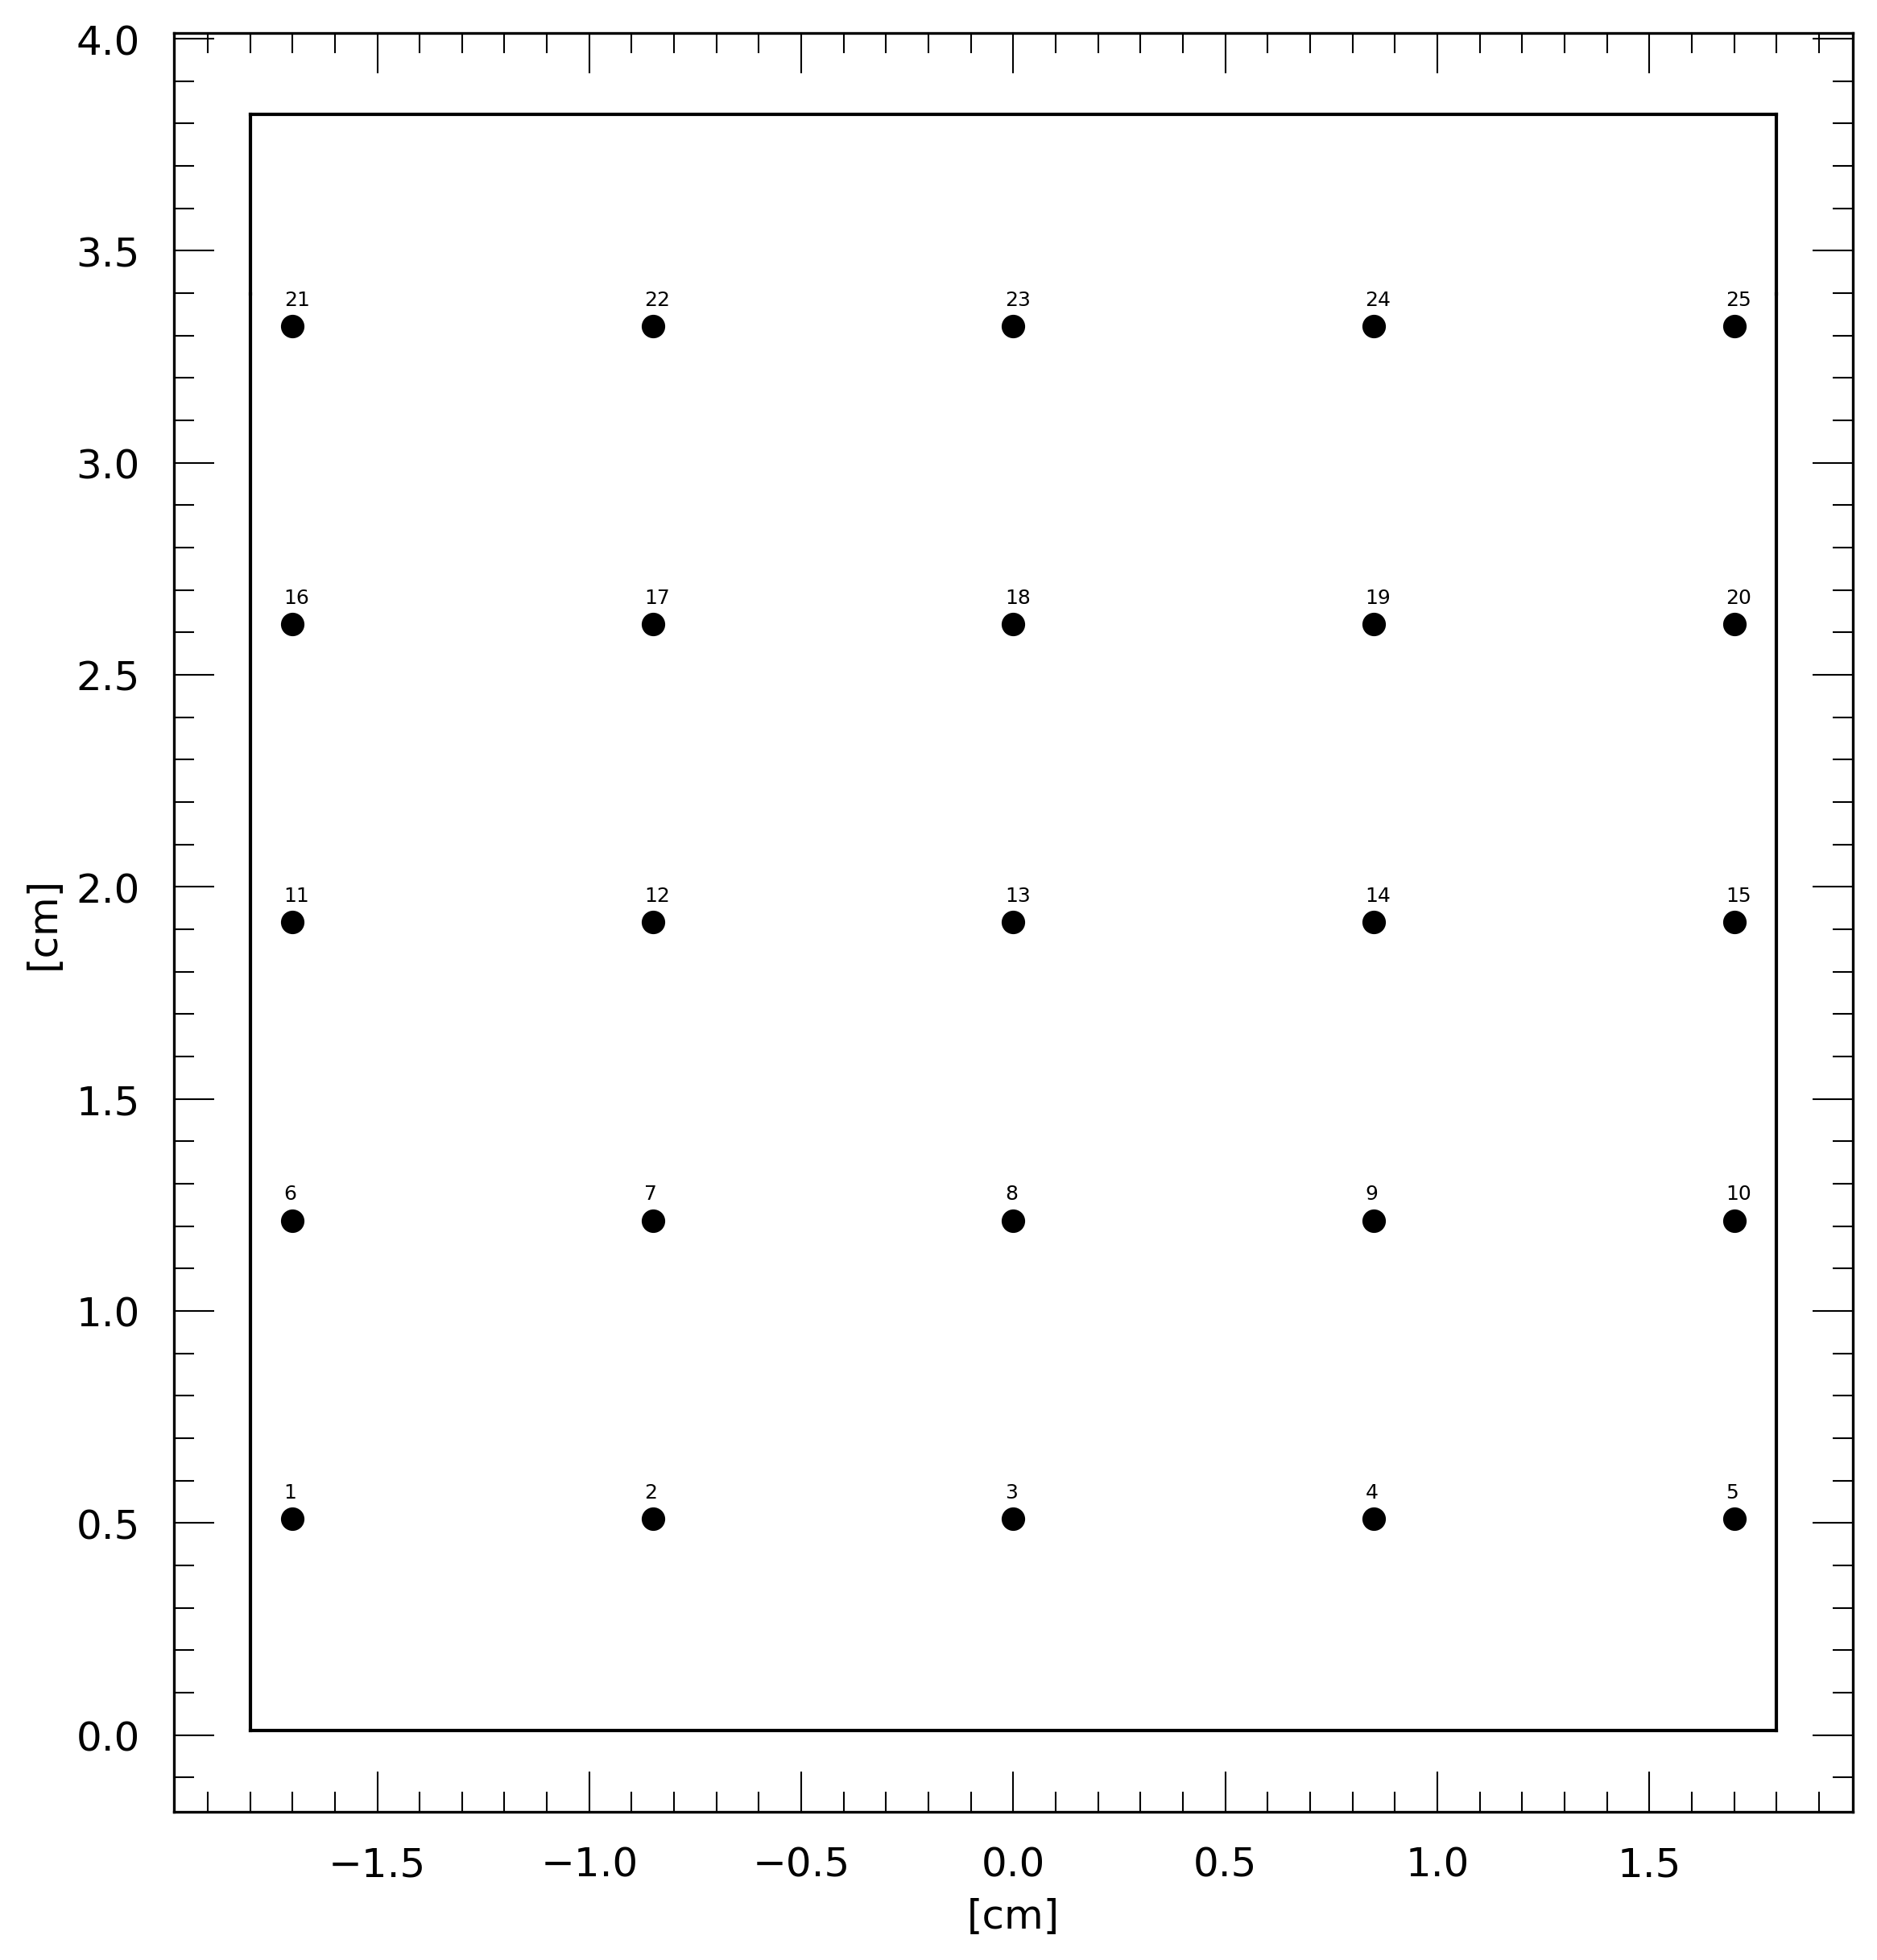

In [5]:
steps = 5
man = st.processing.Manager(
    st.worlds.build_doorstop_angled_world,
    out_dir=f'doorstop-angled/'
)
man.define_grid(
    vertical_range=zrange,
    horizontal_func=lambda z: yrange,
    steps=steps,
    visualize=True
)

## Run

In [8]:
runs = man.run(200, seed=10, visualize=False)

4.25 4.2400143115759175
4.25 4.2400143115759175
4.25 4.2400143115759175


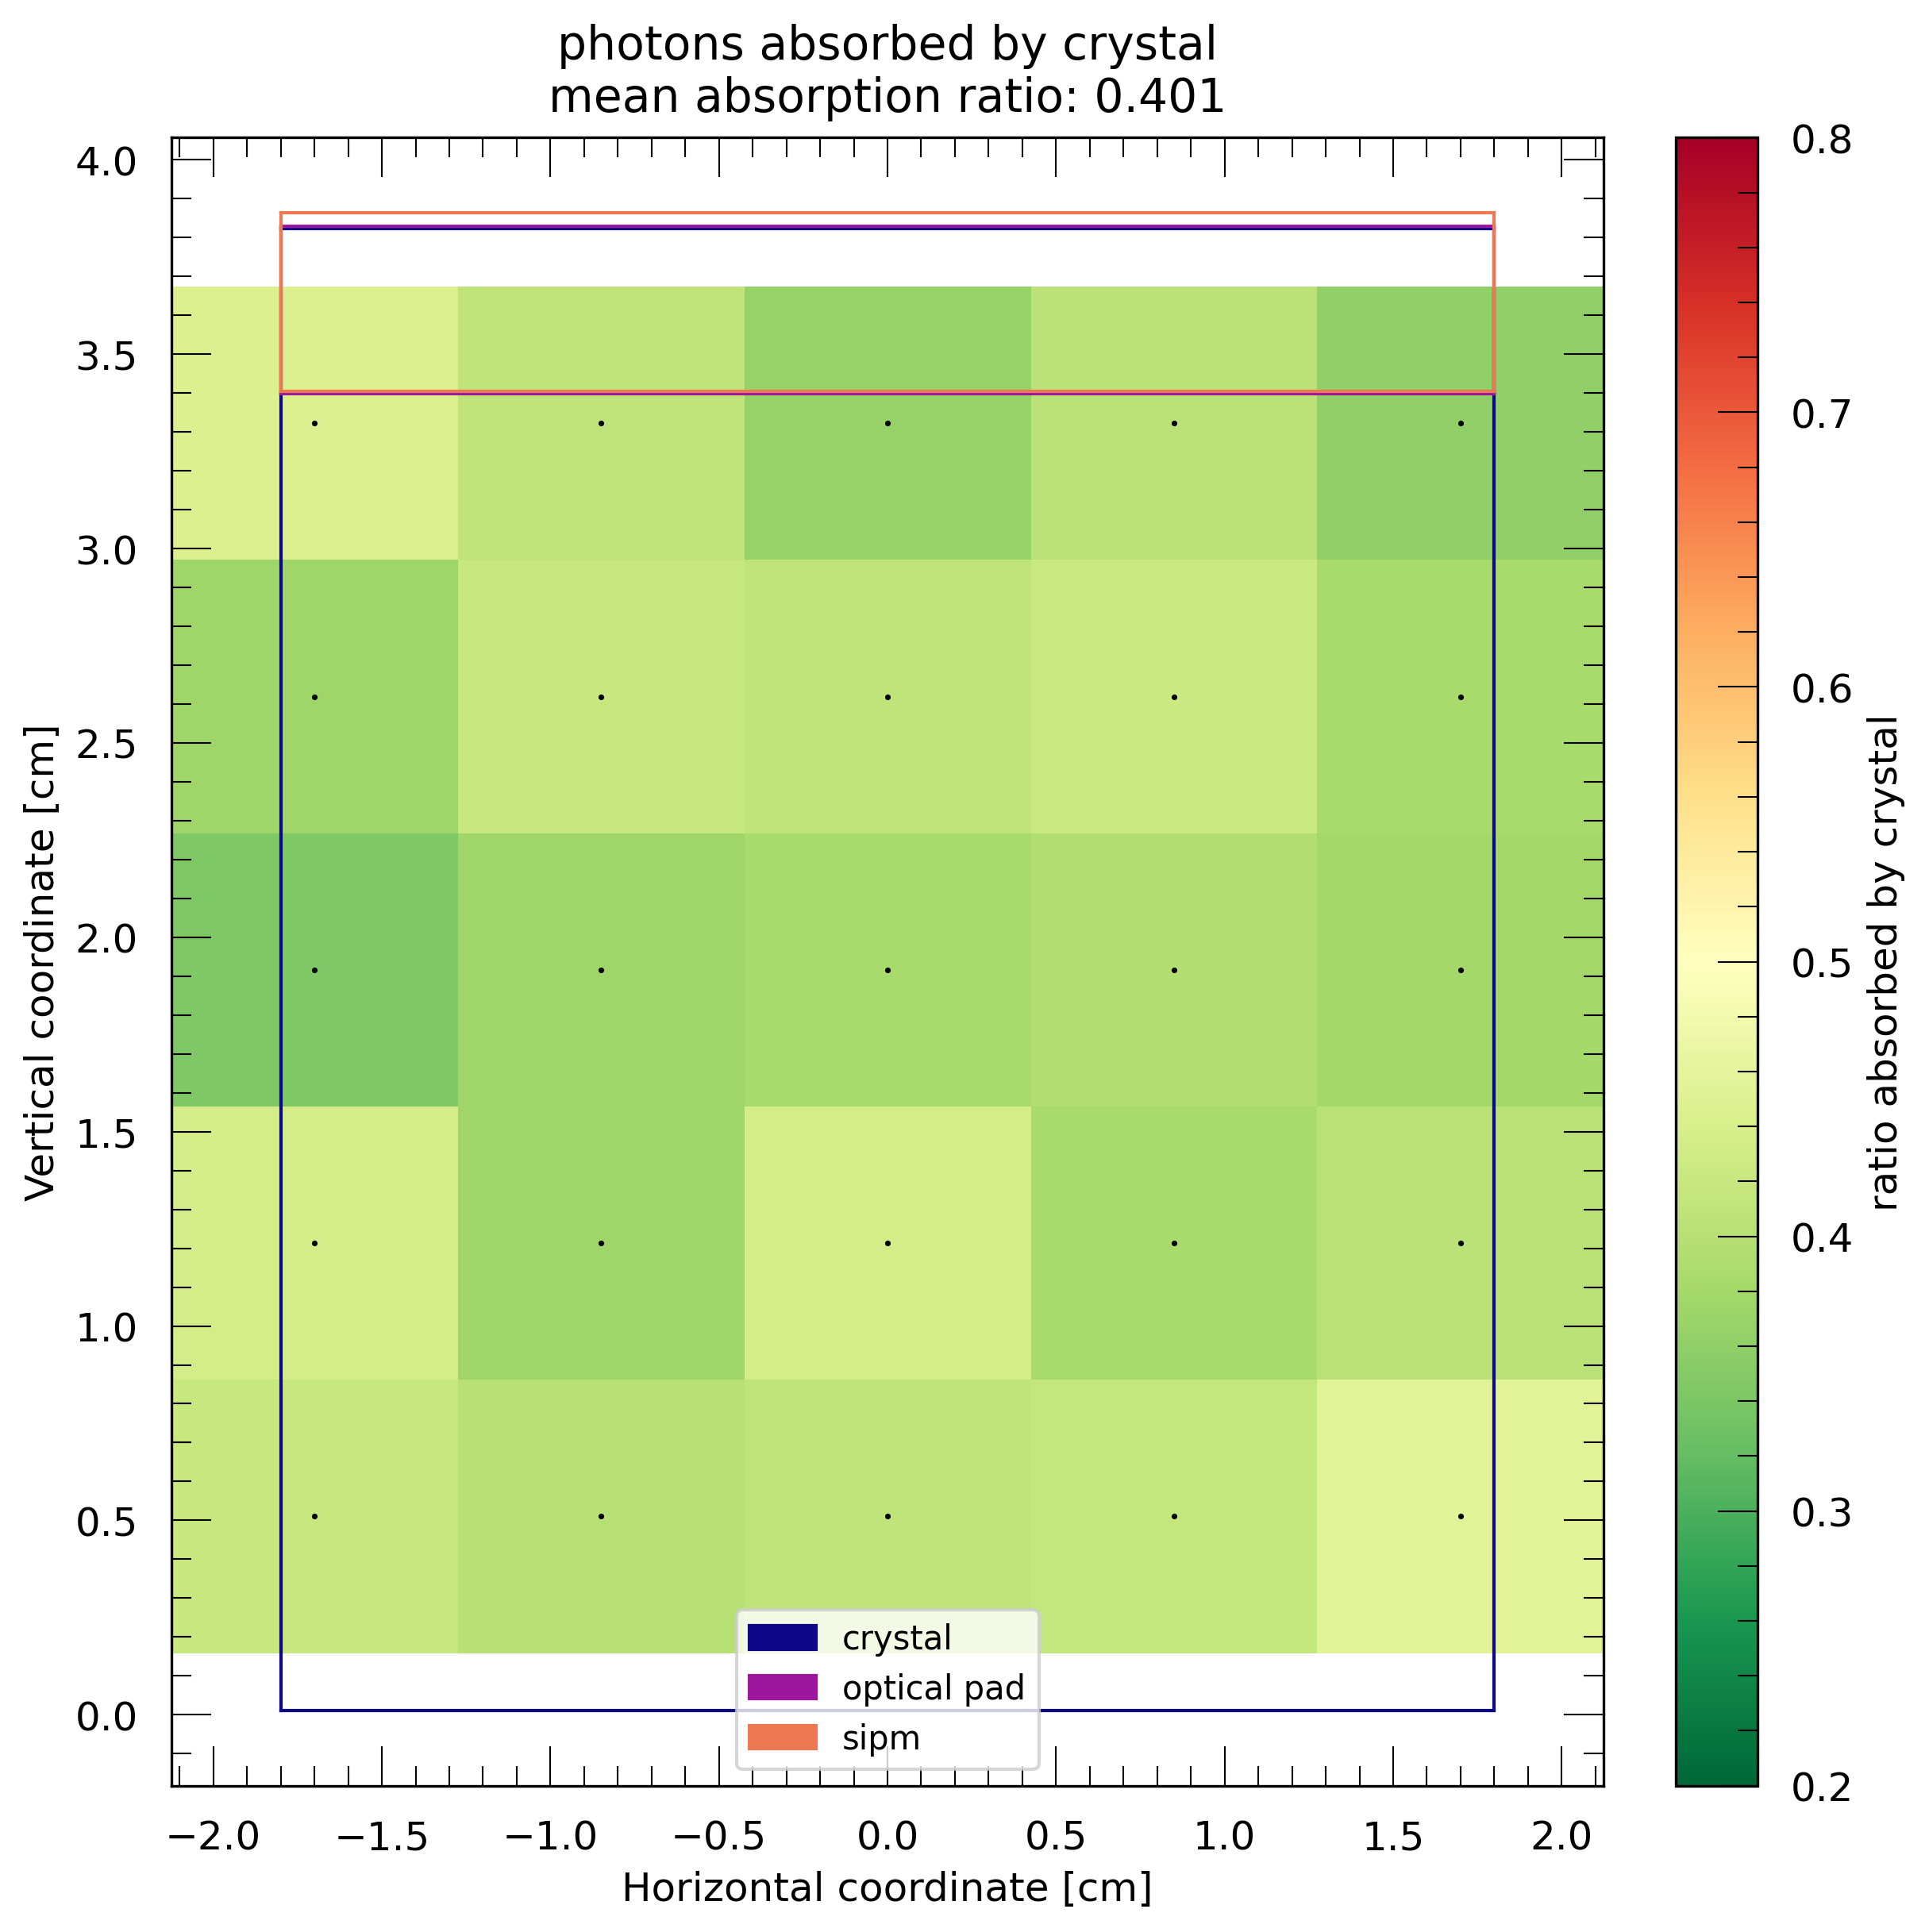

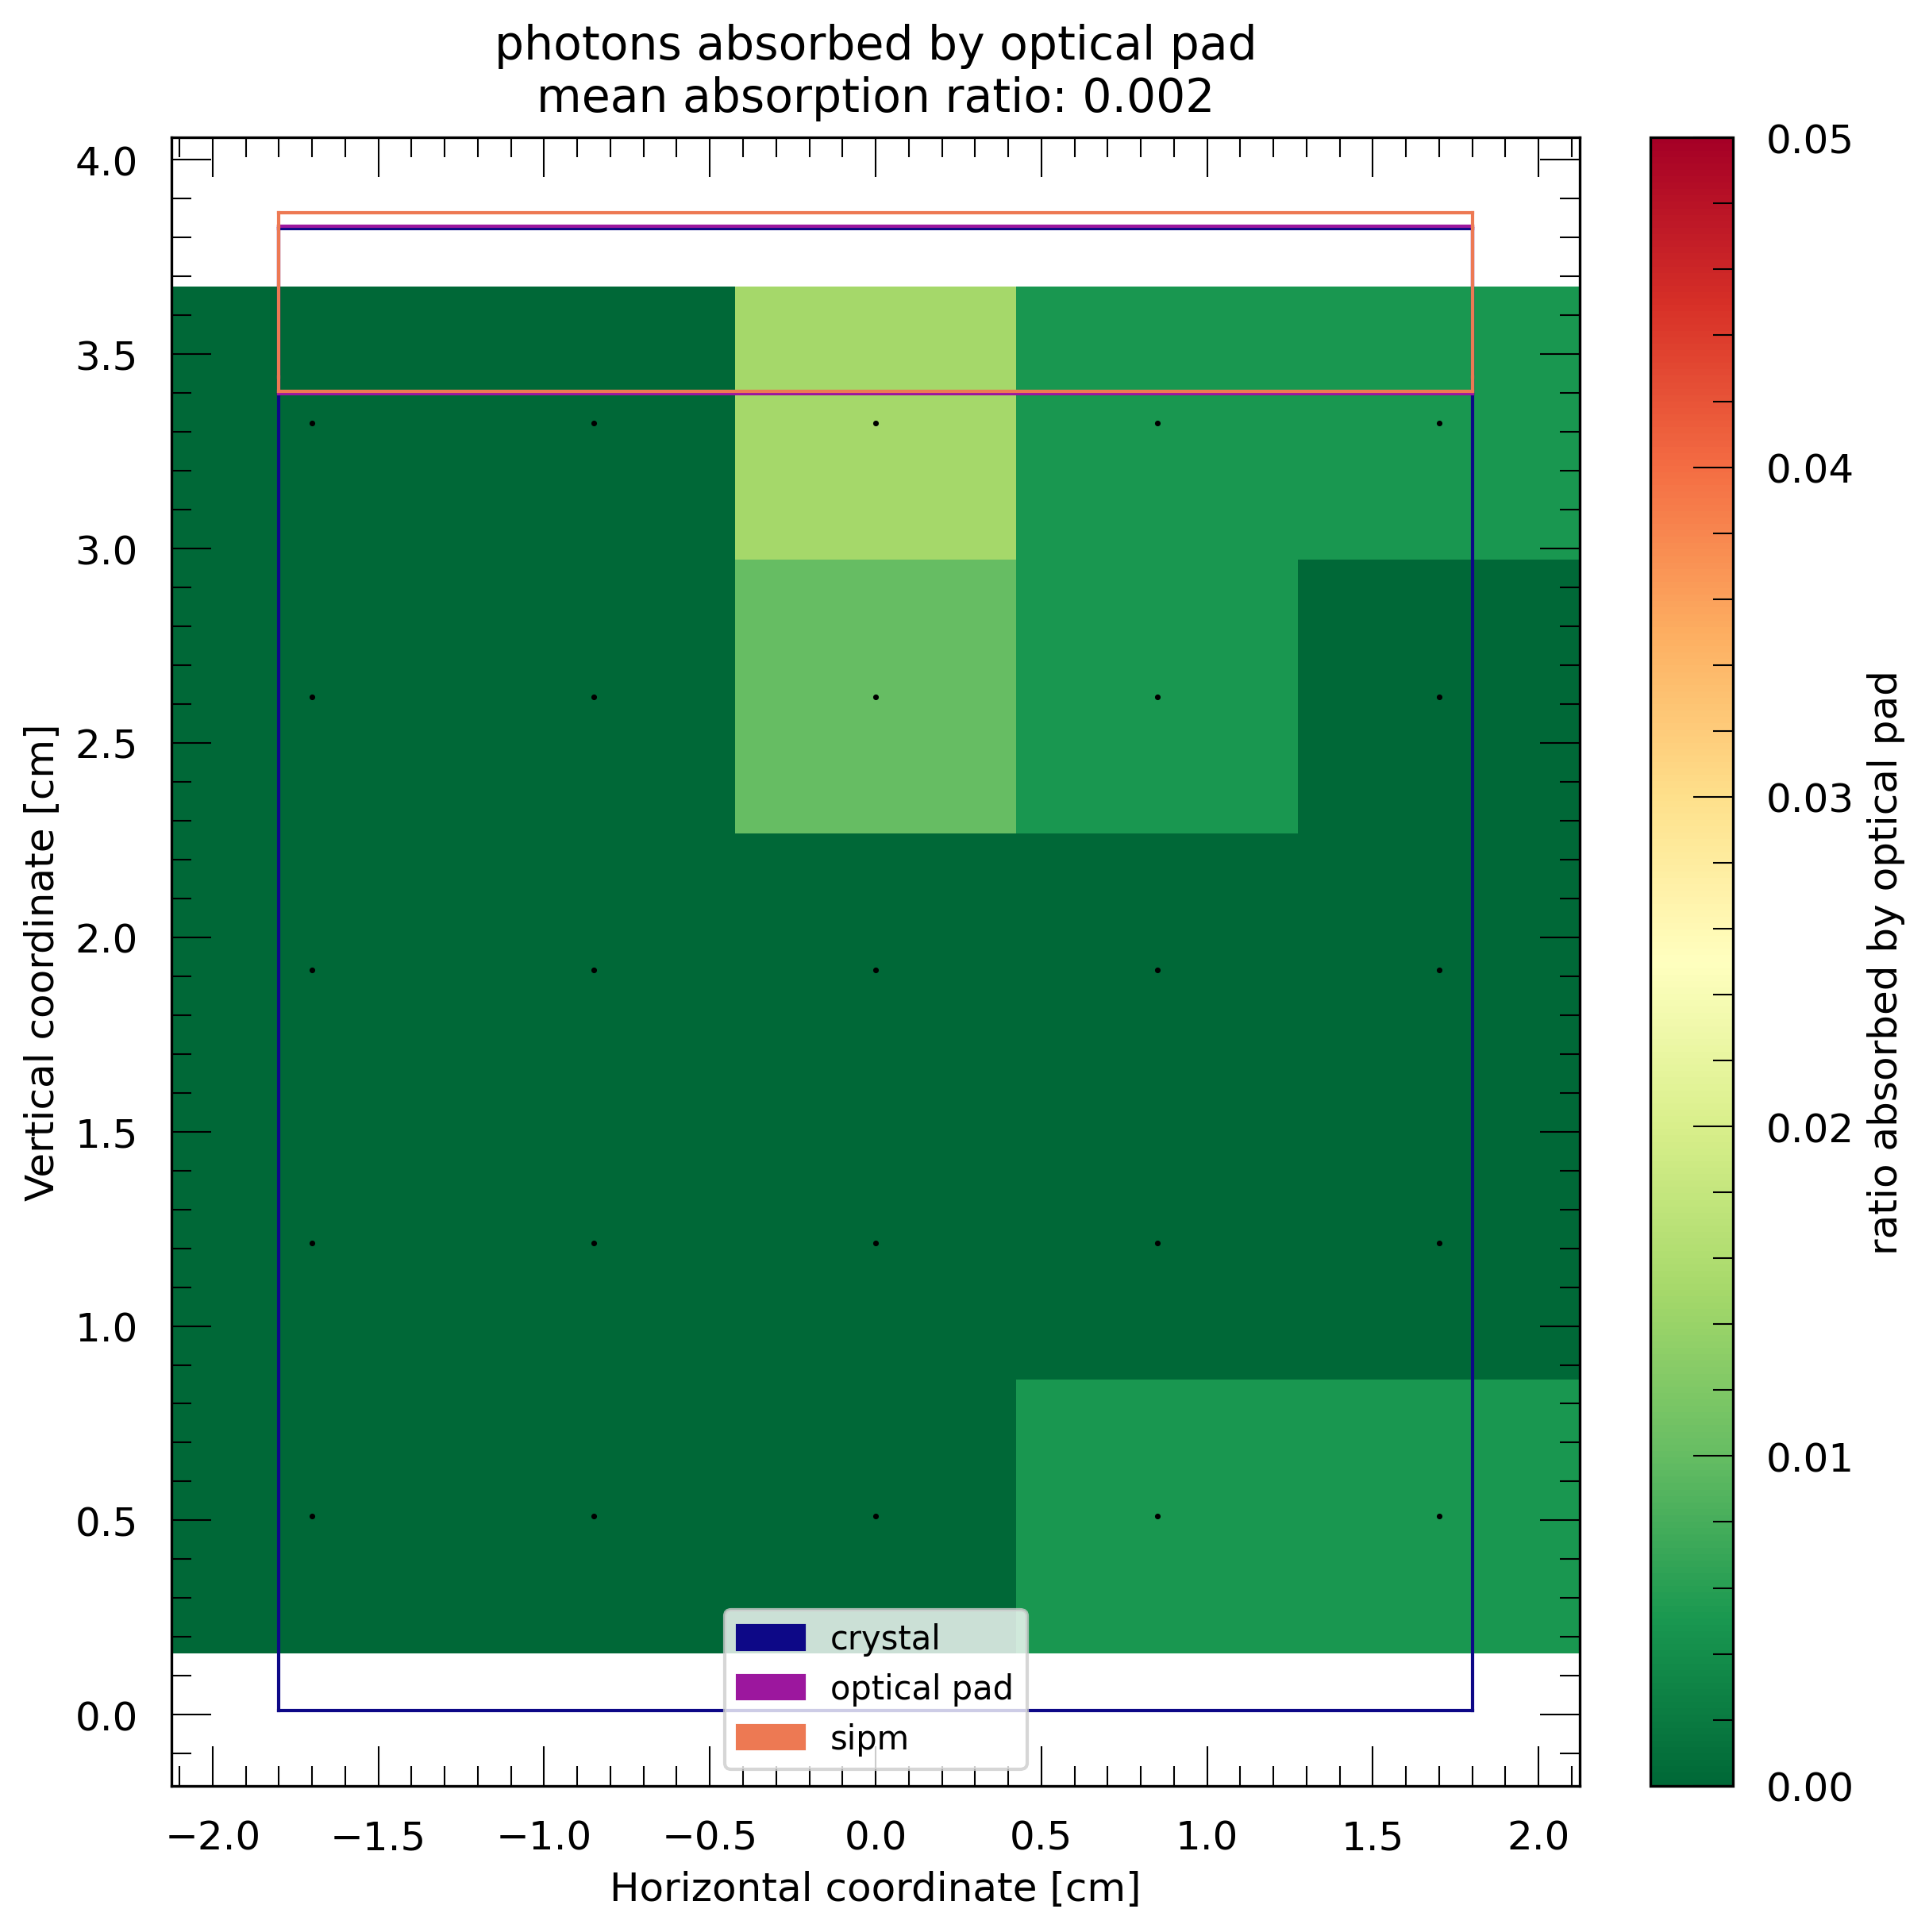

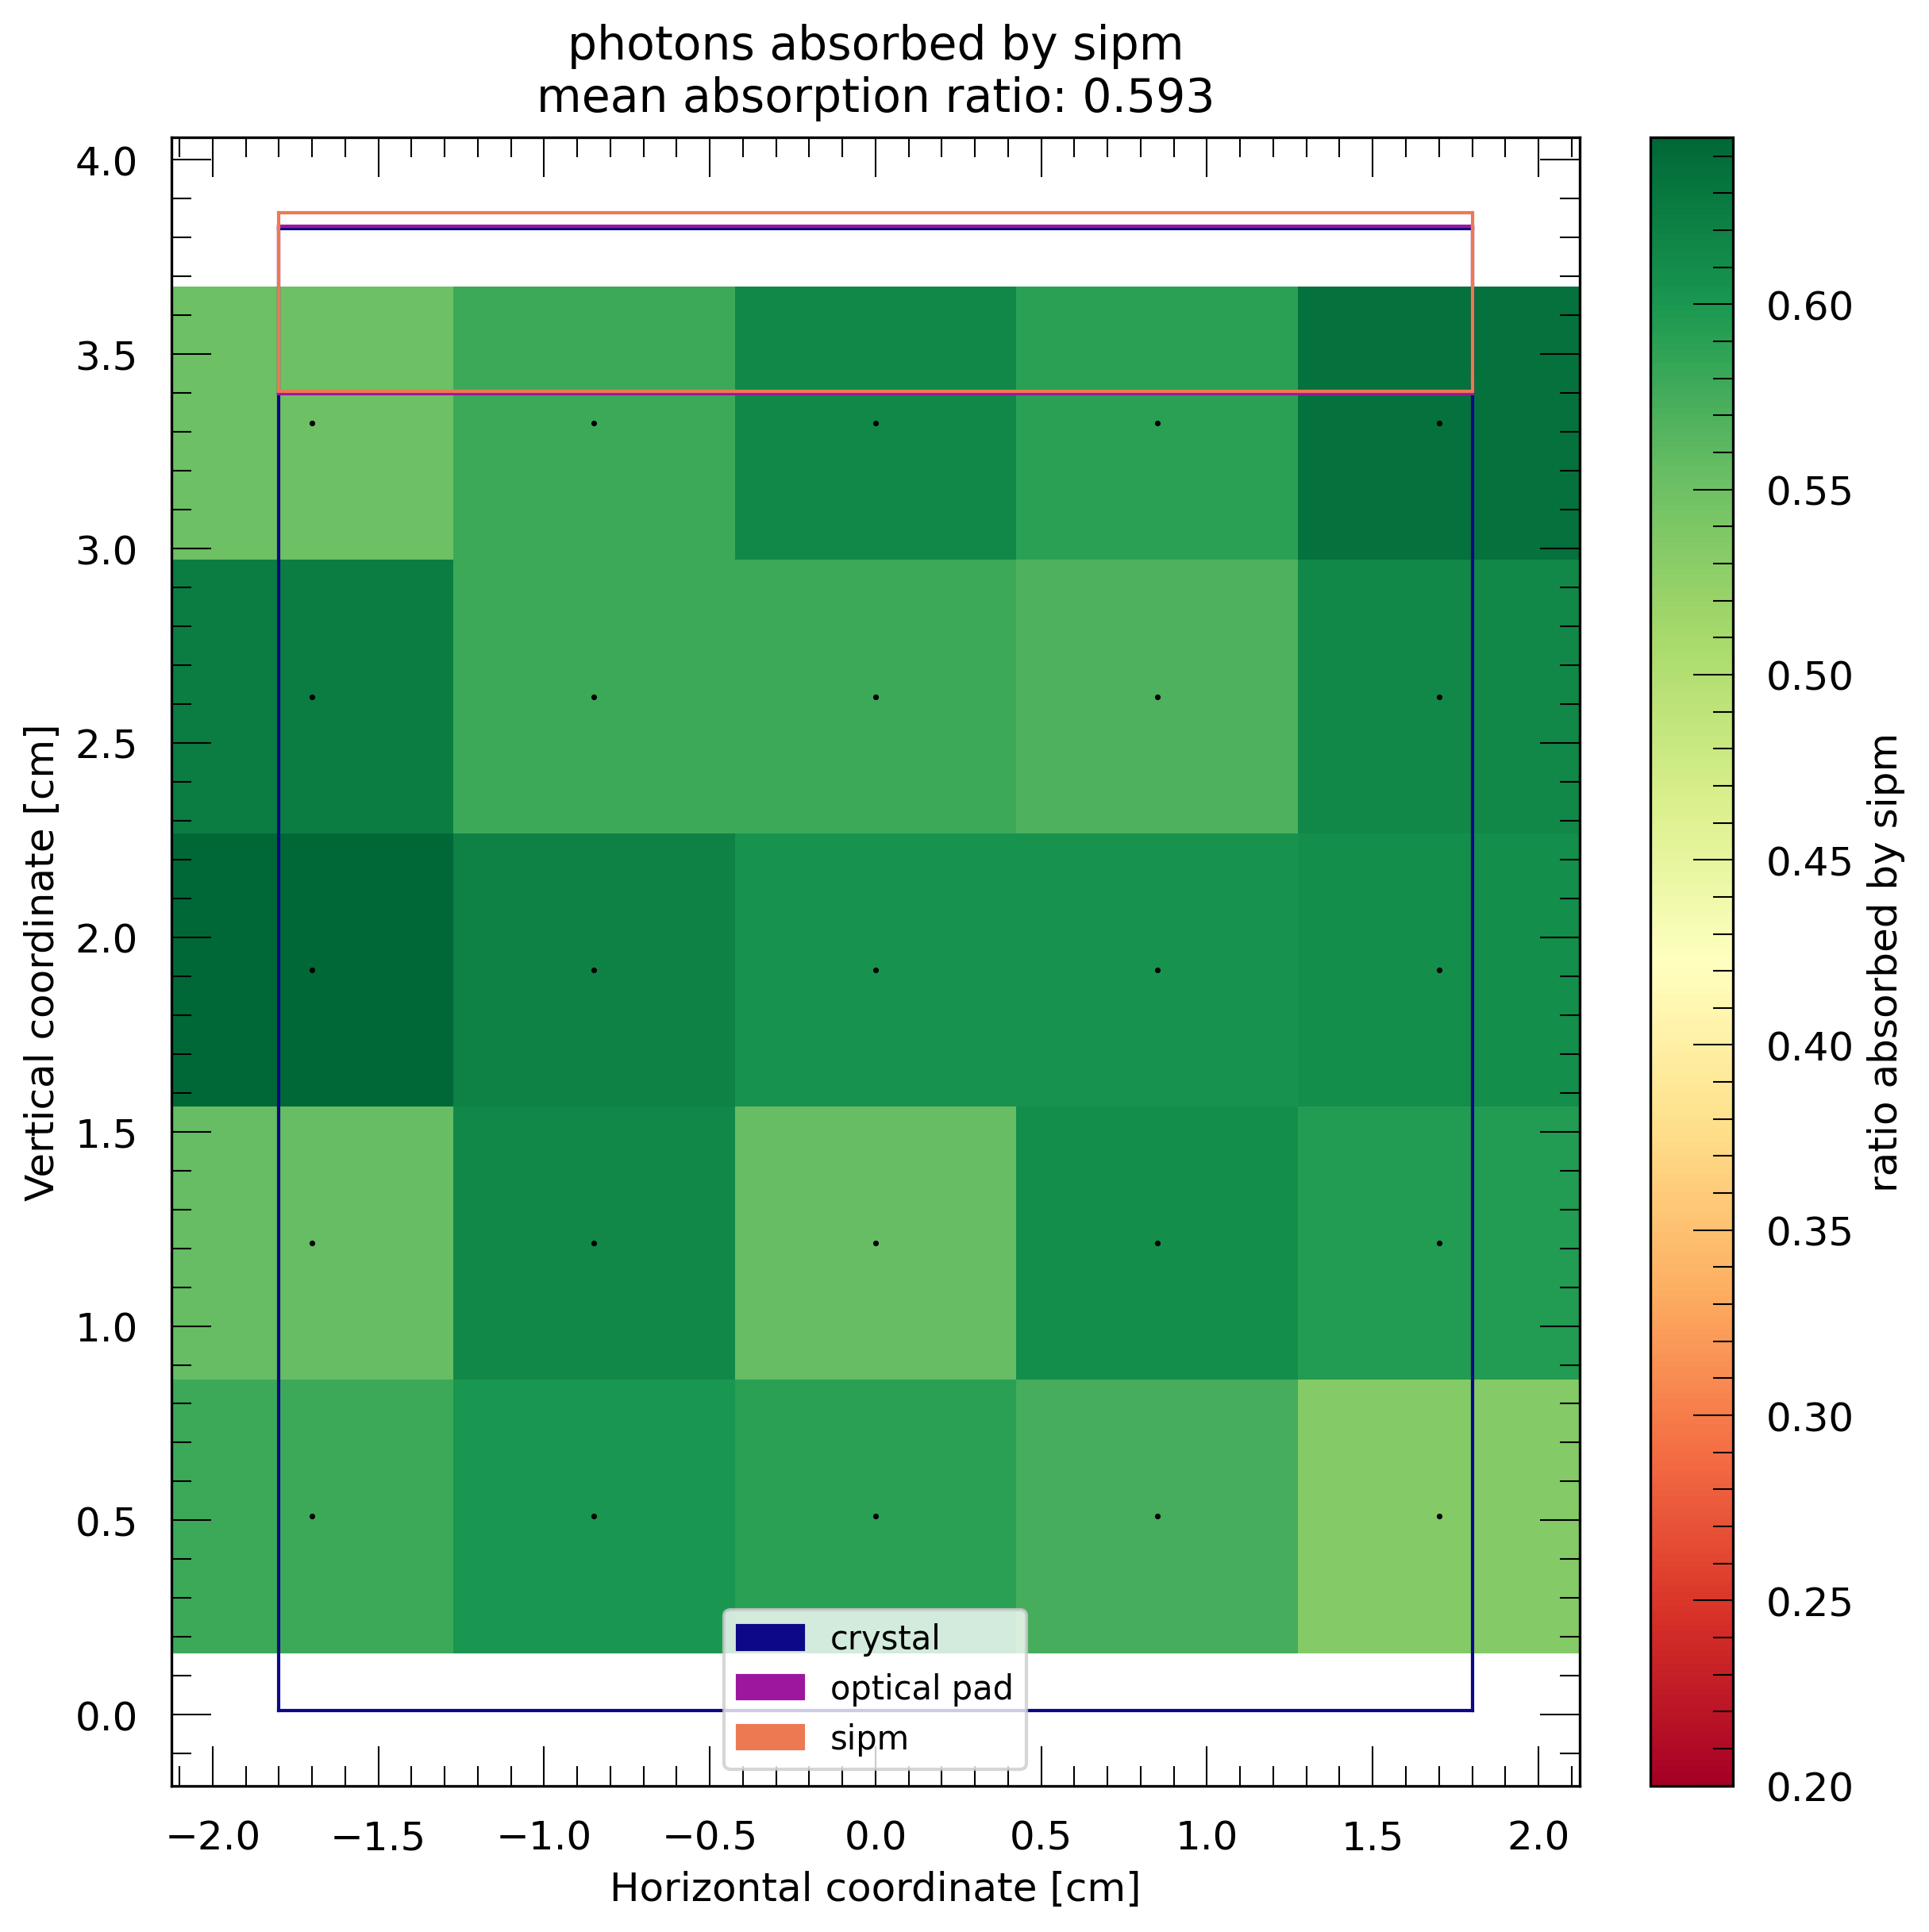

In [10]:
man.plot_all_ratios_absorbed(sipm_kwargs=dict(vmax=None))